In [2]:
# Importamos todos los paquetes que vayamos a necesitar

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import os
import plotly.express as px

# Algunas configuraciones de los paquetes
pd.set_option("display.max_rows", 500) # Cuántas filas de los DataFrames nos "escupe" pandas en el Notebook
# sns.set(color_codes=True)

import warnings
warnings.filterwarnings("ignore")

In [3]:
bilbao_df = pd.read_csv("bilbao_final_sinull.csv", sep=",")
donosti_df = pd.read_csv("donosti_final_sinull.csv", sep=",")
vitoria_df=pd.read_csv("vitoria_final_sinull.csv", sep=",")
bilbao_anualdf = pd.read_csv("bilbao_anual_sinull1.csv", sep=",")
donosti_anualdf = pd.read_csv("donosti_anual_sinull2.csv", sep=",")
vitoria_anualdf=pd.read_csv("vitoria_anual_sinull1.csv", sep=",")

In [4]:
bilbao_df.head()

,año,mes,tm_mes,tm_max,tm_min,ta_max,ta_min,ti_max,ts_min,p_mes,np_300,nt_30,inso
0,1970,1,10.8,14.2,7.3,19.6,-2.6,5.0,13.6,94.1,0.0,0.0,2.1
1,1970,2,8.7,12.8,4.6,18.6,-0.5,7.4,10.2,161.5,2.0,0.0,2.6
2,1970,3,7.8,12.0,3.6,23.4,-1.6,6.4,11.8,120.5,0.0,0.0,2.7
3,1970,4,10.0,14.5,5.4,29.2,0.0,8.6,11.0,120.7,0.0,0.0,4.1
4,1970,5,14.4,19.7,9.2,32.4,3.8,12.6,14.4,39.9,0.0,1.0,5.5


In [5]:
donosti_df.head()

,año,mes,tm_mes,tm_max,tm_min,ta_max,ta_min,ti_max,ts_min,p_mes,np_300,nt_30,inso
0,1970,1,9.5,12.1,6.8,18.0,-1.4,5.0,13.0,196.7,2.0,0.0,2.4
1,1970,2,7.7,9.9,5.5,14.0,-2.0,3.0,11.0,165.8,0.0,0.0,2.3
2,1970,3,7.2,10.0,4.3,20.6,-1.2,2.1,9.5,101.0,0.0,0.0,2.6
3,1970,4,9.5,12.5,6.5,26.5,1.2,6.9,10.9,174.3,1.0,0.0,3.9
4,1970,5,14.0,17.4,10.4,30.6,5.0,9.4,15.0,89.4,1.0,1.0,6.1


In [6]:
vitoria_df.head()

,año,mes,tm_mes,tm_max,tm_min,ta_max,ta_min,ti_max,ts_min,p_mes,np_300,nt_30,inso
0,1970,1,6.6,9.8,3.5,14.6,-6.4,2.6,8.4,127.2,0.0,0.0,2.4
1,1970,2,4.9,8.6,1.2,13.8,-7.0,0.6,7.2,136.4,1.0,0.0,3.8
2,1970,3,5.2,9.0,1.4,20.0,-4.0,1.6,9.2,55.2,0.0,0.0,3.8
3,1970,4,8.4,13.5,3.3,28.4,-2.6,5.6,9.2,37.4,0.0,0.0,5.9
4,1970,5,12.3,17.5,7.0,30.2,0.4,10.0,11.6,93.9,2.0,1.0,6.9


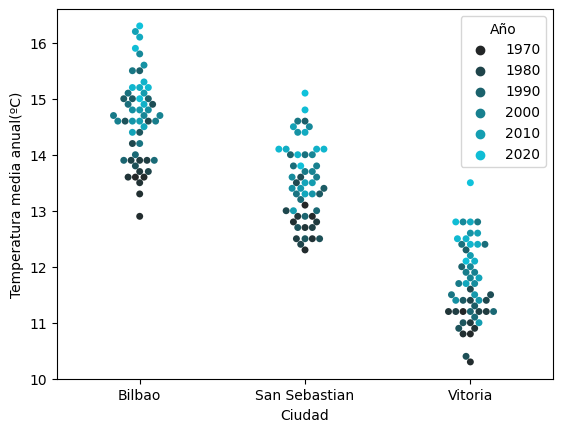

In [7]:
# 1. Gráfico de enjambre para temperatura media

t_media=pd.DataFrame()
t_media["Año"]=bilbao_anualdf["año"]
t_media["Bilbao"]=bilbao_anualdf["tm_mes"]
t_media["San Sebastian"]=donosti_anualdf["tm_mes"]
t_media["Vitoria"]=vitoria_anualdf["tm_mes"]
t_media.head()
t_media_melted=t_media.melt(id_vars=["Año"], value_vars=["Bilbao", "San Sebastian", "Vitoria"], var_name='Ciudad')
t_media_melted.head()

my_palette = sns.color_palette(["red", "green", "blue"])
sns.set_palette(my_palette)
grafico1= sns.swarmplot(t_media_melted, x="Ciudad", y="value", hue="Año", color="#0fc2db")
grafico1.set(ylabel = "Temperatura media anual(ºC)")

t_media.describe()

[Text(29.597222222222214, 0.5, 'Precipitación anual(l/m2)')]

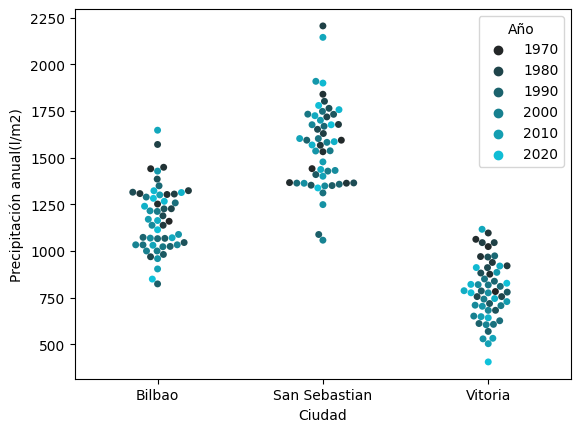

In [11]:
#2. Precipitaciones

precipitaciones=pd.DataFrame()
precipitaciones["Año"]=bilbao_anualdf["año"]
precipitaciones["Bilbao"]=bilbao_anualdf["p_mes"]
precipitaciones["San Sebastian"]=donosti_anualdf["p_mes"]
precipitaciones["Vitoria"]=vitoria_anualdf["p_mes"]

precipitaciones_melted=precipitaciones.melt(id_vars=["Año"], value_vars=["Bilbao", "San Sebastian", "Vitoria"], var_name='Ciudad')
precipitaciones_melted.head()

grafico2= sns.swarmplot(precipitaciones_melted, x="Ciudad", y="value", hue="Año", color="#0fc2db")
grafico2.set(ylabel = "Precipitación anual(l/m2)")

In [12]:
precipitaciones.describe()
precipitaciones.describe().to_excel('precipitaciones.xlsx', index=False)

In [13]:
# Cálculo de parámetros estadísticos para los datos de precipitaciones de los últimos 5 años
precipitaciones_5 = precipitaciones[-5:]
precipitaciones_5.head()
precipitaciones_5.describe().to_excel('precipitaciones5.xlsx', index=False)
precipitaciones_5


,Año,Bilbao,San Sebastian,Vitoria
48,2018,1323.2,1757.6,821.4
49,2019,1266.6,1900.1,911.6
50,2020,1114.1,1780.2,776.3
51,2021,1282.5,1676.6,827.6
52,2022,849.8,1338.2,405.9


[Text(33.972222222222214, 0.5, 'Días con más de 30(l/m2)')]

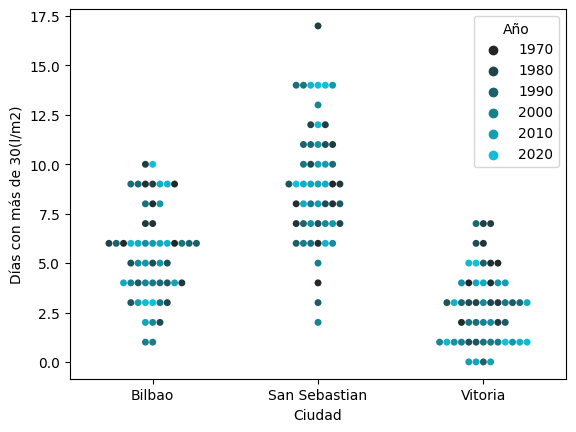

In [14]:
#3. Días con más de 30 l/m2 np300

precipitaciones_30=pd.DataFrame()
precipitaciones_30["Año"]=bilbao_anualdf["año"]
precipitaciones_30["Bilbao"]=bilbao_anualdf["np_300"]
precipitaciones_30["San Sebastian"]=donosti_anualdf["np_300"]
precipitaciones_30["Vitoria"]=vitoria_anualdf["np_300"]

precipitaciones_30_melted=precipitaciones_30.melt(id_vars=["Año"], value_vars=["Bilbao", "San Sebastian", "Vitoria"], var_name='Ciudad')
precipitaciones_30_melted.head()

grafico3= sns.swarmplot(precipitaciones_30_melted, x="Ciudad", y="value", hue="Año", color="#0fc2db")
grafico3.set(ylabel = "Días con más de 30(l/m2)")

In [15]:
precipitaciones_30.head()
precipitaciones_30.describe().to_excel('precipitaciones30.xlsx', index=False)

In [16]:
# Cálculos estadísticos sobre las precipitaciones en los últimos 5 años
precipitaciones_30_5 = precipitaciones_30[-5:]
precipitaciones_30_5.head()
precipitaciones_30_5.describe().to_excel('precipitaciones30_5.xlsx', index=False)
precipitaciones_30_5

,Año,Bilbao,San Sebastian,Vitoria
48,2018,9.0,14.0,1.0
49,2019,6.0,12.0,5.0
50,2020,3.0,14.0,1.0
51,2021,10.0,14.0,5.0
52,2022,3.0,9.0,1.0


[Text(47.097222222222214, 0.5, 'Días al año con más de 30ºC')]

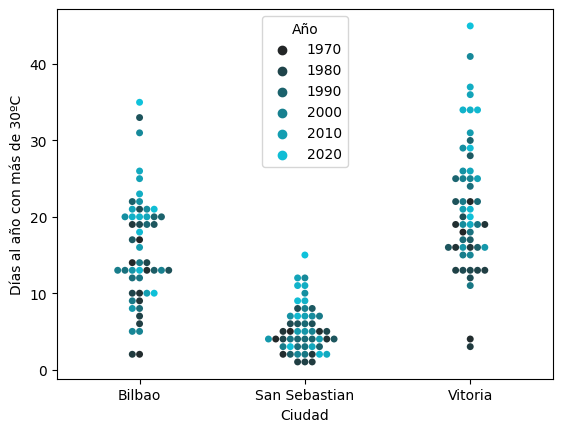

In [17]:
#4. Días con más de 30ºC (nt_30)

t_30=pd.DataFrame()
t_30["Año"]=bilbao_anualdf["año"]
t_30["Bilbao"]=bilbao_anualdf["nt_30"]
t_30["San Sebastian"]=donosti_anualdf["nt_30"]
t_30["Vitoria"]=vitoria_anualdf["nt_30"]

t_30_melted=t_30.melt(id_vars=["Año"], value_vars=["Bilbao", "San Sebastian", "Vitoria"], var_name='Ciudad')
t_30_melted.head()

h= sns.swarmplot(t_30_melted, x="Ciudad", y="value", hue="Año", color="#0fc2db")
h.set(ylabel = "Días al año con más de 30ºC")

In [18]:
#Extraigo los datos de los últimos 5 años
t_30_5 =t_30[-5:]
t_30_5.head()
t_30.describe().to_excel('t30.xlsx', index=False)
t_30_5.describe().to_excel('t30_5.xlsx', index=False)
t_30_5

,Año,Bilbao,San Sebastian,Vitoria
48,2018,13.0,2.0,21.0
49,2019,18.0,7.0,34.0
50,2020,21.0,9.0,29.0
51,2021,10.0,3.0,20.0
52,2022,35.0,15.0,45.0


[Text(0.5, 0, 'Año'),
 Text(0, 0.5, 'Incremento de temperatura respecto 1970(ºC)')]

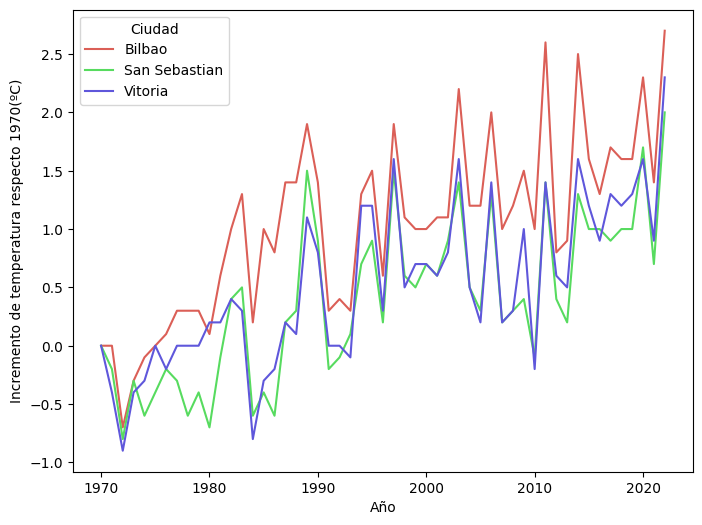

In [27]:
# 5. Comparación de la  temperatura media con 1970

calentamiento = pd.DataFrame()
calentamiento["Año"]=bilbao_anualdf["año"]
calentamiento["Bilbao"]= bilbao_anualdf["tm_mes"].transform(lambda x: x - x.iloc[0])
calentamiento["San Sebastian"]= donosti_anualdf["tm_mes"].transform(lambda x: x - x.iloc[0])
calentamiento["Vitoria"]= vitoria_anualdf["tm_mes"].transform(lambda x: x - x.iloc[0])
calentamiento.head()

calentamiento_melted=calentamiento.melt(id_vars=["Año"], value_vars=["Bilbao", "San Sebastian", "Vitoria"], var_name='Ciudad')
calentamiento_melted.head()


plt.figure(figsize=(8,6))
graf5=sns.lineplot(data=calentamiento_melted, x='Año', y='value', hue='Ciudad', palette="hls")
sns.color_palette("light:b", as_cmap=True)

graf5.set(xlabel= "Año", ylabel = "Incremento de temperatura respecto 1970(ºC)")

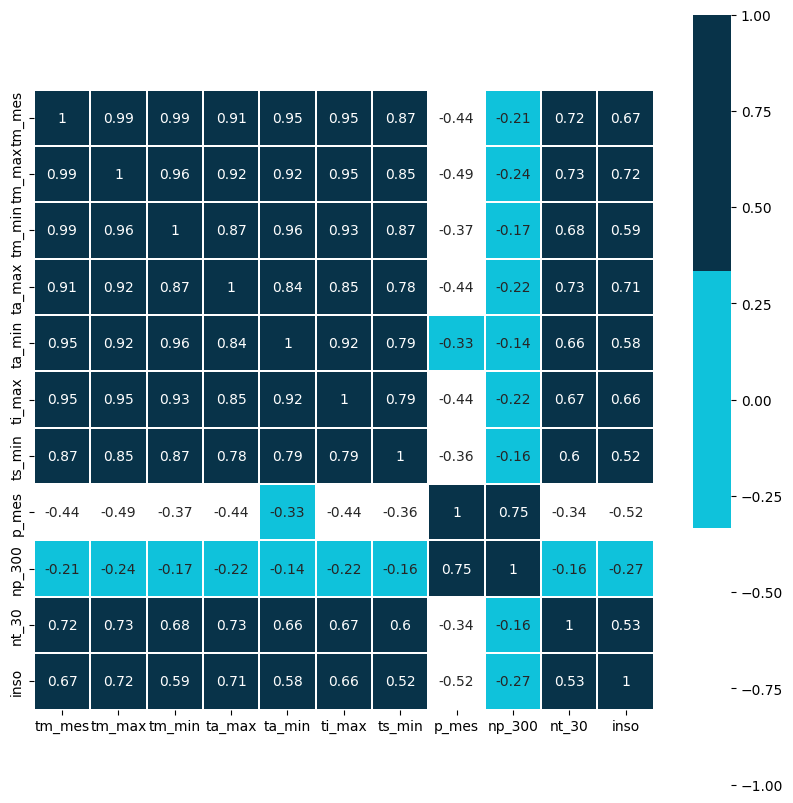

In [29]:
# 6. Gráfico de correlación entre todas las variables

bilbao_df_sin= bilbao_df.drop(["año", "mes"], axis=1)
bilbao_df_sin

plt.figure(figsize=(10,10))
sns.heatmap(bilbao_df_sin.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.color_palette(["#ffffff", "#0fc2db", "#083349"]),
            square=True,
            linewidths=.1,
            annot=True);

In [21]:
# Mapa del País Vasco

import folium # pip install folium
from folium import plugins
import ipywidgets
import geocoder # pip install geocoder
import geopy # pip install geopy
import numpy as np
import pandas as pd
from vega_datasets import data as vds # pip install vega_datasets

In [22]:
place1 = 'Bilbao'
address1 = geocoder.osm(place1)
address_latlng1 = [address1.lat, address1.lng]
print(address_latlng1)

place2 = 'San Sebastian'
address2 = geocoder.osm(place2)
address_latlng2 = [address2.lat, address2.lng]
print(address_latlng2)

place3 = 'Vitoria'
address3 = geocoder.osm(place3)
address_latlng3 = [address3.lat, address3.lng]
print(address_latlng3)

[43.2630018, -2.9350039]
[43.3224219, -1.9838889]
[42.8465088, -2.6724025]


In [23]:
markers_dict = {'Bilbao': address_latlng1, 
                'San Sebastian': address_latlng2, 
                'Vitoria': address_latlng3}

# create map
map_cities = folium.Map(location=[43.1, -2.4], zoom_start=9.3)

# plot locations
for i in markers_dict.items():
    folium.Marker(location=i[1], popup=i[0]).add_to(map_cities)
    print(i)

# display map    
map_cities

('Bilbao', [43.2630018, -2.9350039])
('San Sebastian', [43.3224219, -1.9838889])
('Vitoria', [42.8465088, -2.6724025])


In [24]:
import io
from PIL import Image

img_data = map_cities._to_png(5)
img = Image.open(io.BytesIO(img_data))
img.save('mapa_euskadi.png')